In [1]:
import numpy as np
import matplotlib.pyplot as plt

'''Order of Grpahs:
1) Transportation Sector Diesel Prices Forecasted, Best Fitted Equation (Greatest R^2 Value)
2) Transportation Sector Energy Prices, South Atlantic
3) Forecasts of Annual Class 8 Vehicle Miles Trvaled* 
4) Salvage Value of Class 8 Trucks Per Year
5) Operating Cost of Class 8 Vehicles
6) Yearly Tax Savings
7) CO2/Miles Linear Regression

Starting year is assumed 2021 (by the function defined in the second box 'year' due to data commonly gathered up until that year) unless otherwise specified
Information located on this Document: https://usfedu-my.sharepoint.com/:w:/g/personal/lawolf_usf_edu/EZJ8ZOqFfh9DmaVdircy9JoBQDQAhN6Jyg0o8PlutB600A?e=MDLb3C
'''

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 17.8 MB/s eta 0:00:00
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 3108, in _dep_map
    return self.__dep_map
  File "/usr/local/lib/python3.10/dist-packages/pip/_vendor/pkg_resources/__init__.py", line 2901, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/req_command.py", line 242, in wrapper
    return func(self, options, args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/co

"Order of Grpahs:\n1) Transportation Sector Diesel Prices Forecasted, Best Fitted Equation (Greatest R^2 Value)\n2) Transportation Sector Energy Prices, South Atlantic\n3) Forecasts of Annual Class 8 Vehicle Miles Trvaled* \n4) Salvage Value of Class 8 Trucks Per Year\n5) Operating Cost of Class 8 Vehicles\n6) Yearly Tax Savings\n7) CO2/Miles Linear Regression\n\nStarting year is assumed 2021 (by the function defined in the second box 'year' due to data commonly gathered up until that year) unless otherwise specified\nInformation located on this Document: https://usfedu-my.sharepoint.com/:w:/g/personal/lawolf_usf_edu/EZJ8ZOqFfh9DmaVdircy9JoBQDQAhN6Jyg0o8PlutB600A?e=MDLb3C\n"

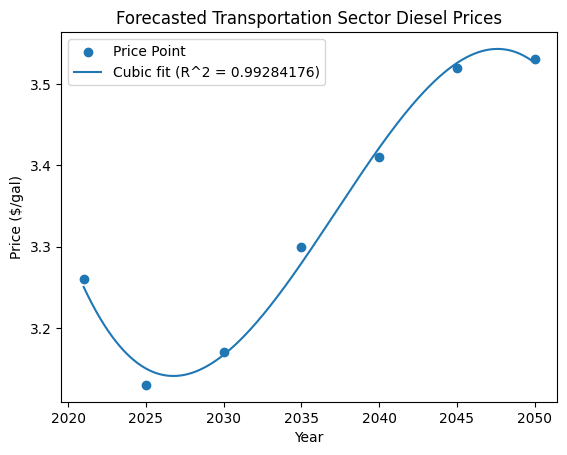

Equation: y = -0.00008877x^3 + 0.54249909x^2 + -1105.14536180x + 750428.12818948
R-squared value: 0.992842


In [2]:
#1) Transportation Sector Diesel Prices Forecasted, Best Fitted Equation (Greatest R^2 Value)
years, prices = np.array([2021, 2025, 2030, 2035, 2040, 2045, 2050]), np.array([3.26, 3.13, 3.17, 3.30, 3.41, 3.52, 3.53])

coeffs = np.polyfit(years, prices, 3)
fit = np.poly1d(coeffs)
prices_pred = fit(years)
r_squared = 1 - (np.sum((prices - prices_pred)**2) / np.sum((prices - np.mean(prices))**2))
plt.scatter(years, prices, label="Price Point")
x = np.linspace(2021, 2050, 1000)
plt.plot(x, fit(x), label="Cubic fit (R^2 = {:.8f})".format(r_squared))
plt.xlabel("Year")
plt.ylabel("Price ($/gal)")
plt.title("Forecasted Transportation Sector Diesel Prices")
plt.legend(), plt.show()

print("Equation: y = {:.8f}x^3 + {:.8f}x^2 + {:.8f}x + {:.8f}".format(coeffs[0], coeffs[1], coeffs[2], coeffs[3]))
print("R-squared value: {:.6f}".format(r_squared))


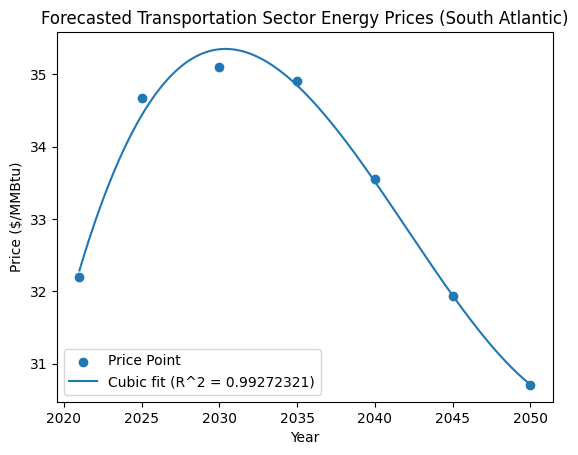

Equation: y = -0.00008877x^3 + 0.54249909x^2 + -1105.14536180x + 750428.12818948
R-squared value: 0.992723


In [3]:
#2) Transportation Sector Energy Prices, South Atlantic
eprices = np.array([32.204, 34.671, 35.106, 34.915, 33.552, 31.932, 30.705])

ecoeffs = np.polyfit(years, eprices, 3)
efit = np.poly1d(ecoeffs)
eprices_pred = efit(years)
er_squared = 1 - (np.sum((eprices - eprices_pred)**2) / np.sum((eprices - np.mean(eprices))**2))
plt.scatter(years, eprices, label="Price Point")
ex = np.linspace(2021, 2050, 1000)
plt.plot(ex, efit(ex), label="Cubic fit (R^2 = {:.8f})".format(er_squared))
plt.xlabel("Year")
plt.ylabel("Price ($/MMBtu)")
plt.title("Forecasted Transportation Sector Energy Prices (South Atlantic)")
plt.legend(), plt.show()

print("Equation: y = {:.8f}x^3 + {:.8f}x^2 + {:.8f}x + {:.8f}".format(coeffs[0], coeffs[1], coeffs[2], coeffs[3]))
print("R-squared value: {:.6f}".format(er_squared))

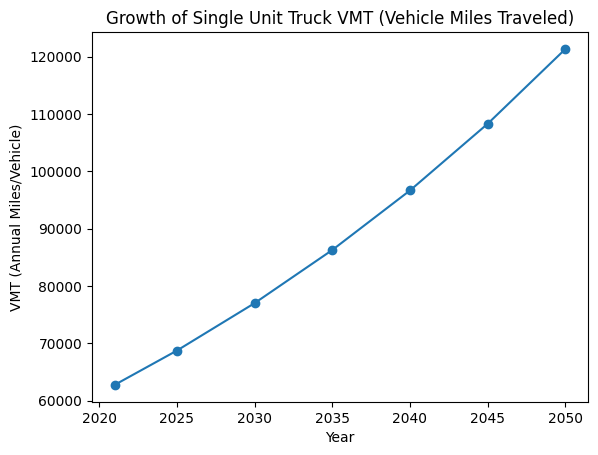

VMT(t) = [2021 2025 2030 2035 2040 2045 2050] * (1 + 0.023)^(t - 2021)


In [4]:
#3) Forecasts of Annual Class 8 Vehicle Miles Trvaled 
#Should there be a cap? the final value in 2050 121342.81 miles is extremely high

VMTinitial, growth_rate = 62751, 0.023
VMT_values = VMTinitial * (1 + growth_rate)**(years - 2021)

plt.plot(years, VMT_values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("VMT (Annual Miles/Vehicle)")
plt.title("Growth of Single Unit Truck VMT (Vehicle Miles Traveled)")
plt.show()

print(f"VMT(t) = {years} * (1 + {growth_rate})^(t - 2021)")

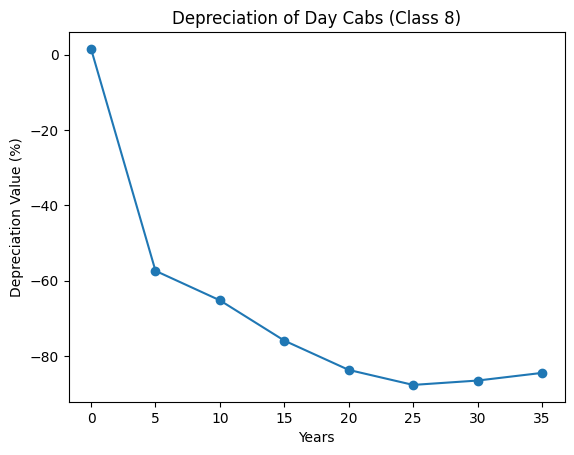

Cubic function:            3         2
-0.005569 x + 0.419 x - 10.22 x - 3.672
R^2 value: 0.958792


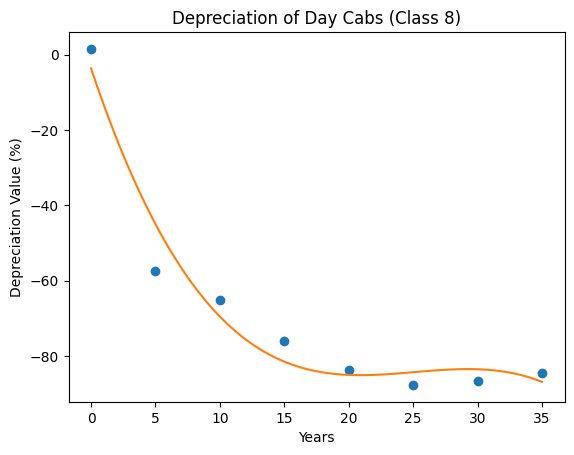

In [5]:
#4)Salvage Value of Class 8 Trucks Per Year (Day Cabs)
#https://equipmentwatch.com/intel/equipment-values-market-data/heavy-duty-truck-used-price-depreciation-due-high-utilization/

depreciation = np.array([1.4968, -57.367, -65.195, -75.879, -83.651, -87.630, -86.471, -84.440])
syears = np.arange(0, 36, 5)
plt.plot(syears, depreciation, marker='o')
plt.xlabel("Years")
plt.ylabel("Depreciation Value (%)")
plt.title("Depreciation of Day Cabs (Class 8)")
plt.show()

#Best Fit Curve:
coefficients = np.polyfit(syears, depreciation, 3)
cubic_function = np.poly1d(coefficients)
r_squared = 1 - (np.sum((depreciation - cubic_function(syears)) ** 2) / np.sum((depreciation - np.mean(depreciation)) ** 2))

print(f"Cubic function: {cubic_function}\nR^2 value: {r_squared:.6f}")

plt.plot(syears, depreciation, 'o')
plt.plot(np.linspace(0, 35, 100), cubic_function(np.linspace(0, 35, 100)), label="Cubic fit")
plt.xlabel("Years")
plt.ylabel("Depreciation Value (%)")
plt.title("Depreciation of Day Cabs (Class 8)")
plt.show()

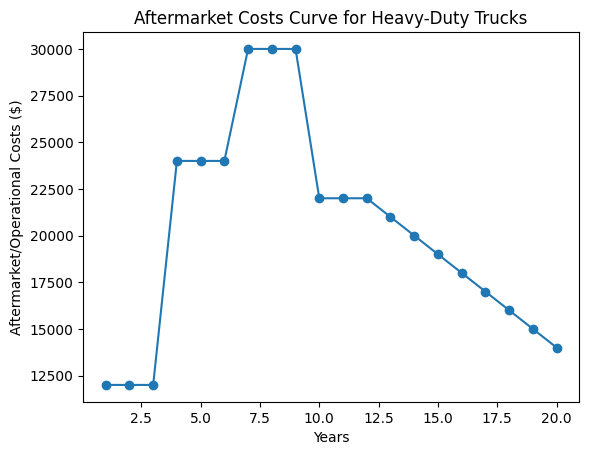

In [6]:
#5) Operating Cost of Class 8 Vehicles
#Operational costs after the 20th year are reduced by $1,000 yearly
yearOC = np.arange(1, 21)
aftermarketOC = np.piecewise(yearOC, [(yearOC >= 1) & (yearOC <= 3), 
                                          (yearOC >= 4) & (yearOC <= 6), 
                                          (yearOC >= 7) & (yearOC <= 9),
                                          (yearOC >= 10) & (yearOC <= 12), 
                                          yearOC > 12],
                                 [12000, 24000, 30000, 22000, lambda x: 22000 - 1000 * (x - 12)])

plt.plot(yearOC, aftermarketOC, marker='o')
plt.xlabel('Years')
plt.ylabel('Aftermarket/Operational Costs ($)')
plt.title('Aftermarket Costs Curve for Heavy-Duty Trucks')
plt.show()

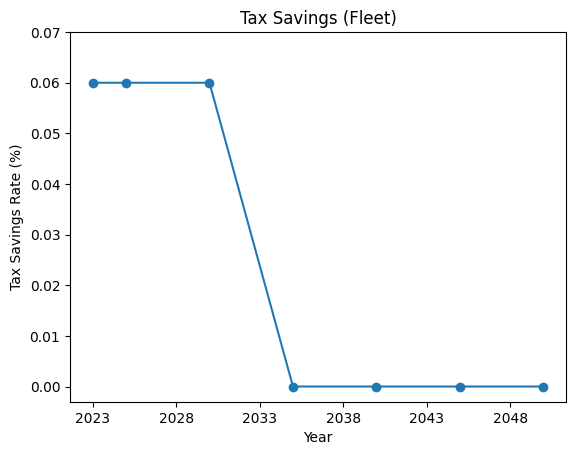

In [7]:
#6) Yearly Tax Savings
# This includes: credits/savings/rebate program

def tax_savings_rate(t):
    return 0.06 if 0 <= t <= 11 else 0

years[years == 2021] = 2023
years_since_2023 = years - 2023
tax_savings_rate_values = np.array([tax_savings_rate(t) for t in years_since_2023])

plt.plot(years, tax_savings_rate_values, marker='o', linestyle='-')
plt.xlabel("Year")
plt.ylabel("Tax Savings Rate (%)")
plt.title("Tax Savings (Fleet)")
plt.xticks(years)
plt.yticks(np.arange(0, 0.07, 0.01))
plt.xticks(np.arange(2023, 2050, 5))
plt.show()

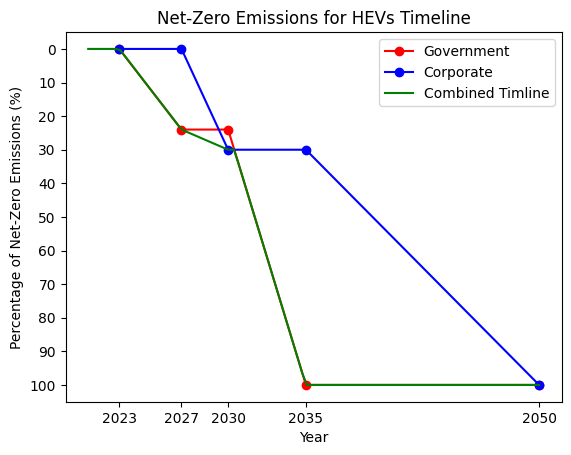

In [8]:
#7) CO2/Miles Linear Regression
#The compiled data, this is included https://www.transportation.gov/briefing-room/epa-dot-propose-greenhouse-gas-and-fuel-efficiency-standards-heavy-duty-trucks

tyears = np.array([2023, 2027, 2030, 2035, 2050])
gov = np.array([0, 24, 24, 100, 100])
corp = np.array([0, 0, 30, 30, 100])

def combined_timeline(t):
    if t <= 2027:
        return np.interp(t, tyears, gov)
    elif t <= 2030:
        slope = (corp[2] - gov[2]) / (tyears[2] - tyears[1])
        return gov[1] + slope * (t - tyears[1])
    else:
        return max(np.interp(t, tyears, gov), np.interp(t, tyears, corp))

interp_years = np.linspace(2021, 2050, num=100)
combined = np.array([combined_timeline(t) for t in interp_years])

plt.plot(tyears, gov, 'ro-', label="Government")
plt.plot(tyears, corp, 'bo-', label="Corporate")
plt.plot(interp_years, combined, 'g-', label="Combined Timline")
plt.xlabel("Year")
plt.ylabel("Percentage of Net-Zero Emissions (%)")
plt.title("Net-Zero Emissions for HEVs Timeline")
plt.xticks(tyears)
plt.yticks(np.arange(0, 101, 10))
plt.gca().invert_yaxis()
plt.legend()
plt.show()